# Independent Component Analysis (ICA)
This notebook explores the utiliy of ICA and how it differs from PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
from sklearn.datasets import load_sample_images

Let's start with a simplified [cocktail party](https://en.wikipedia.org/wiki/Signal_separation) problem. We will first generate sine waves of differing frequencies and amplitudes. Then we will mix them together.

Text(0.5, 1.0, 'Mixed Observations (Linear Sum)')

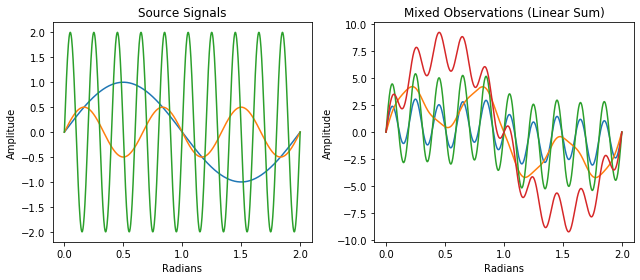

In [2]:
freqs = 1, 3, 10
amplitudes = 1, 0.5, 2
start, stop, n_samples = 0, 2*np.pi, 1000

sample_points = np.linspace(start, stop, n_samples)
sine_waves = np.array([np.sin(sample_points * f) * a for f, a in zip(freqs, amplitudes)]).T
A = np.array([[1, 1, 1], 
              [3, 5, 0.1], 
              [1.5, 1.0, 2.0],
              [8, 1, 0.9]])  # Mixing matrix
mixed = np.dot(sine_waves, A.T)  # Generate observations

plt.figure(figsize=(9,4), tight_layout=True)
plt.subplot(1,2,1)
plt.plot(sample_points / np.pi, sine_waves)
plt.xlabel('Radians'), plt.ylabel('Amplitude')
plt.title('Source Signals')

plt.subplot(1,2,2)
plt.plot(sample_points / np.pi, mixed)
plt.xlabel('Radians'), plt.ylabel('Amplitude')
plt.title('Mixed Observations (Linear Sum)')

Now we will apply ICA to our mixed signal, and compare the recovered and original sources.

Text(0.5, 1.0, 'Original Sources')

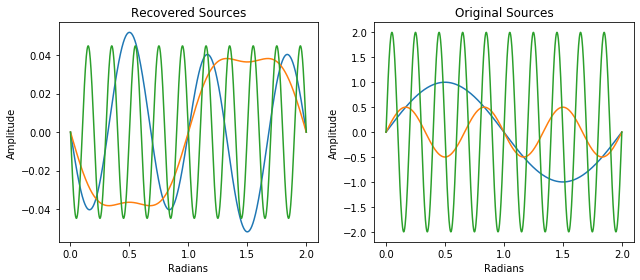

In [40]:
transformer = FastICA(n_components=3, random_state=0)
mixed_transformed = transformer.fit_transform(mixed)

plt.figure(figsize=(9,4), tight_layout=True)
plt.subplot(1,2,1)
plt.plot(sample_points / np.pi, mixed_transformed)
plt.xlabel('Radians'), plt.ylabel('Amplitude')
plt.title('Recovered Sources')

plt.subplot(1,2,2)
plt.plot(sample_points / np.pi, sine_waves)
plt.xlabel('Radians'), plt.ylabel('Amplitude')
plt.title('Original Sources')

ICA does not account for temporal relationships within the data. As a result, it can be applied to many forms of "mixed" data, even images!

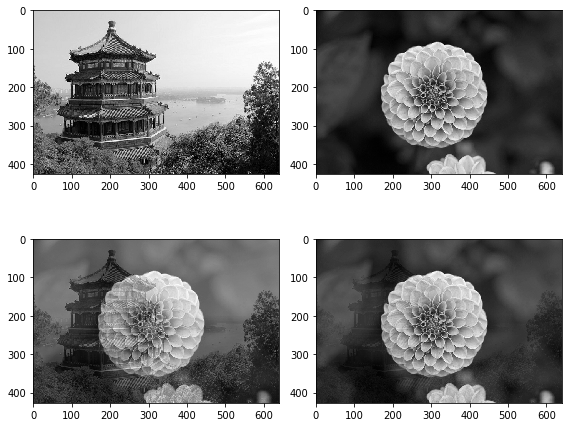

In [96]:
image1_idx, image2_idx = 0, 1
obv1, obv2 = 0, 1

dataset = load_sample_images()
rgb_weights = [0.2989, 0.5870, 0.1140] # Used to convert images to grayscale
img1 =  np.dot(dataset['images'][image1_idx], rgb_weights)
img2 =  np.dot(dataset['images'][image2_idx], rgb_weights)
img_shape = img1.shape
img_flattened = np.vstack([img1.reshape(1,-1), img2.reshape(1,-1)]).T
mixing_matrix = np.array([[2, 0.5],
                           [0.6, 5],
                           [3, 2.2]])
observations = np.dot(img_flattened, mixing_matrix.T)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8), tight_layout=True)
ax1.imshow(img1, cmap='gray')
ax2.imshow(img2, cmap='gray')

img1_mixed = observations[:,obv1].reshape(img_shape)
img2_mixed = observations[:,obv2].reshape(img_shape)
ax3.imshow(img1_mixed, cmap='gray')
ax4.imshow(img2_mixed, cmap='gray')

Finally we will demix via ICA to recover the original sources. We can also compare the recovered components against PCA.

(<matplotlib.image.AxesImage at 0x7fb4256dcfd0>, Text(0.5, 1.0, 'PCA1'))

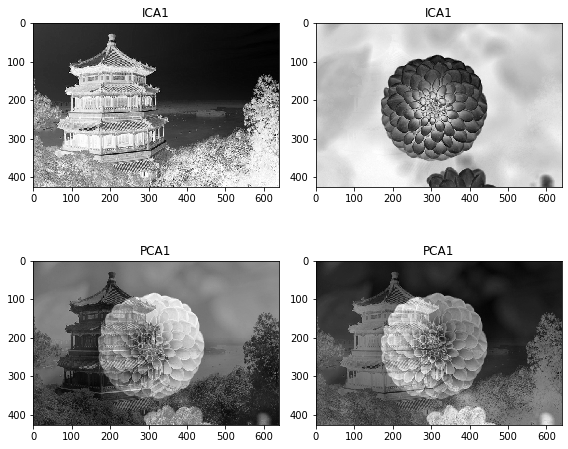

In [109]:
ica = FastICA(n_components=2, random_state=0)
pca = PCA(n_components=2, random_state=0)
mixed_transformed = ica.fit_transform(observations)
ica_1 = mixed_transformed[:,0].reshape(img_shape)
ica_2 = mixed_transformed[:,1].reshape(img_shape)

mixed_transformed = pca.fit_transform(observations)
pca_1 = mixed_transformed[:,0].reshape(img_shape)
pca_2 = mixed_transformed[:,1].reshape(img_shape)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8), tight_layout=True)
ax1.imshow(ica_1, cmap='gray'), ax1.set_title('ICA1')
ax2.imshow(ica_2, cmap='gray'), ax2.set_title('ICA2')

ax3.imshow(pca_1, cmap='gray'), ax3.set_title('PCA1')
ax4.imshow(pca_2, cmap='gray'), ax4.set_title('PCA2')
